pytorch == 2.3.0+cu118

python == 3.11.9

cuda == 11.8


In [1]:
import torch
from data_handler import DataHandler, load_encoded_data
from model import TravelDocClassifier
from cuda_utils import clear_cache, print_cuda_memory_info
from torch.utils.data import  Subset
import numpy as np

c:\Users\wei\Desktop\programs\information-retrieval\ir_final_doc_classifier\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
clear_cache()
print_cuda_memory_info()

Device: NVIDIA GeForce RTX 4070 SUPER
Total Memory: 12.88 GB
Reserved Memory: 0.00 GB
Allocated Memory: 0.00 GB
Free Memory: 0.00 GB


In [3]:
from sklearn.model_selection import train_test_split

data_handler = DataHandler(tokenizer_name='bert-base-chinese')

encodings, labels = load_encoded_data('encoded_data/train')

length = len(labels)

# 使用 train_test_split 生成訓練集和驗證集的索引
train_indices, val_indices = train_test_split(np.arange(length), test_size=0.2, random_state=42)

# 創建訓練集和驗證集的子集
train_dataset = Subset(data_handler.create_dataset(encodings, labels), train_indices)
val_dataset = Subset(data_handler.create_dataset(encodings, labels), val_indices)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\wei\Desktop\programs\information-retrieval\ir_final_doc_classifier\Lib\site-packages\transformers\models\bert\modeling_bert.py:435: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Epoch 1/3 | Train Loss: 0.1588 | Train Accuracy: 93.93%
Epoch 2/3 | Train Loss: 0.1212 | Train Accuracy: 95.53%
Epoch 3/3 | Train Loss: 0.1059 | Train Accuracy: 96.21%
Early stopping at epoch 3
Saving parameters at parameters/20240602_94_model_parameters.pth
Best Val Loss: 0.1412, Best Val Accuracy: 94.42%


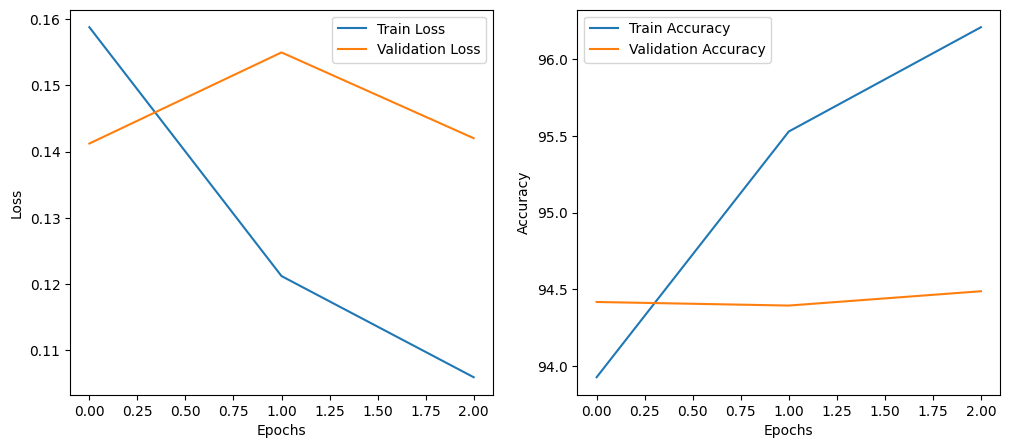

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

classifier = TravelDocClassifier(device=device)
stats = classifier.train(train_dataset, val_dataset, epochs=3, batch_size=32, learning_rate=5e-5, patience=2)

# 輸出結果
print(f'Best Val Loss: {stats["best_val_loss"]:.4f}, Best Val Accuracy: {stats["best_val_accuracy"]:.2f}%')
classifier.plot_metrics(stats)